### Simple KNN Clasifier with CIFAR-10

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

transform = transforms.ToTensor()

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

In [3]:
# Prepare data for simple KNN classifier

x_train = np.array([img.numpy().flatten() for img, _ in trainset])
y_train = np.array([label for _, label in trainset])

x_test = np.array([img.numpy().flatten() for img, _ in testset])
y_test = np.array([label for _, label in testset])

### No Validation Simple KNN

In [6]:
best_k_train = None
best_train_acc = -1.0
accuracy_scores = []

# Can not determine best k without validation set
# So, we use heuristic k = 3
heuristic_k = 3

model = KNeighborsClassifier(n_neighbors=heuristic_k)
model.fit(x_train, y_train)

y_test_pred = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print("best n_neighbors:", test_acc)
print("Heuristic n_neighbors:", heuristic_k)
print("Accuracy :", test_acc)
print("F1 Score : ", test_f1)
print("Precision : ", test_precision)
print("Recall : ", test_recall)

best n_neighbors: 0.3303
Heuristic n_neighbors: 3
Accuracy : 0.3303
F1 Score :  0.319192437989963
Precision :  0.430375458626426
Recall :  0.3303


### K-fold Cross Validation 

best n_neighbors: 1
Testing Accuracy with best k on training set
Accuracy : 0.3539
F1 Score :  0.3494752122873106
Precision :  0.41122464684632654
Recall :  0.3539


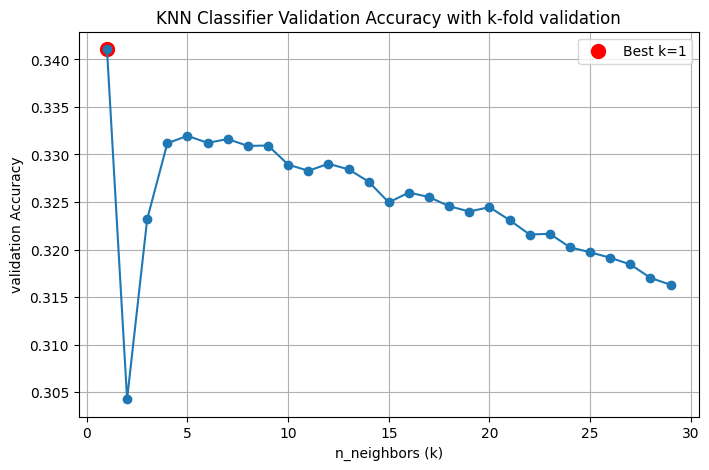

In [ ]:
model = KNeighborsClassifier()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'n_neighbors': range(1,30)}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(x_test)

test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print("best n_neighbors:", grid_search.best_params_['n_neighbors'])
print("Testing Accuracy with best k on validation set")
print("Accuracy :", test_acc)
print("F1 Score : ", test_f1)
print("Precision : ", test_precision)
print("Recall : ", test_recall)

# visualize the results
mean_scores = grid_search.cv_results_['mean_test_score']
k_values = param_grid['n_neighbors']

plt.figure(figsize=(8, 5))
plt.plot(k_values, mean_scores, marker='o', linestyle='-')
plt.xlabel("n_neighbors (k)")
plt.ylabel("validation Accuracy")
plt.title("KNN Classifier Validation Accuracy with k-fold validation")
plt.grid(True)

# best k and score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_
plt.scatter(best_k, best_score, color='red', s=100, label=f"Best k={best_k}")
plt.legend()
plt.show()